<a href="https://colab.research.google.com/github/leakydishes/Fairness_feedback_nlp_test/blob/main/Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deakin University Internship 2023**
##*Phase 1,* Human-Guided Fair Classification for NLP

####This research (*Phase 1*) reproduces and tests the fair classification for Natural Language Processing (NLP) tasks (Human-Guided Fair Classification for Natural Language Processing, 2023). Using unsupervised style transfer to generate pairs of sentences that are similar in meaning but differ along sensitive attributes. The model is then validated with human feedback to ensure that the generated pairs adhere to fair constraints (treated equally). The resulting pairs are used to train toxicity classifiers, which aim to mitigate biases and ensure equitable outcomes in NLP tasks. <br>

<br>

###Project includes,
#####*Phase 1,* Human-Guided Fair Classification for NLP
#####*Phase 2,* Semantic Communication
<br>

#####References:
*@inproceedings{
dorner2023humanguided,
title={Human-Guided Fair Classification for Natural Language Processing},
author={Florian E. Dorner and Momchil Peychev and Nikola Konstantinov and Naman Goel and Elliott Ash and Martin Vechev},
booktitle={The Eleventh International Conference on Learning Representations },
year={2023},
url={https://openreview.net/forum?id=N_g8TT9Cy7f}
}*

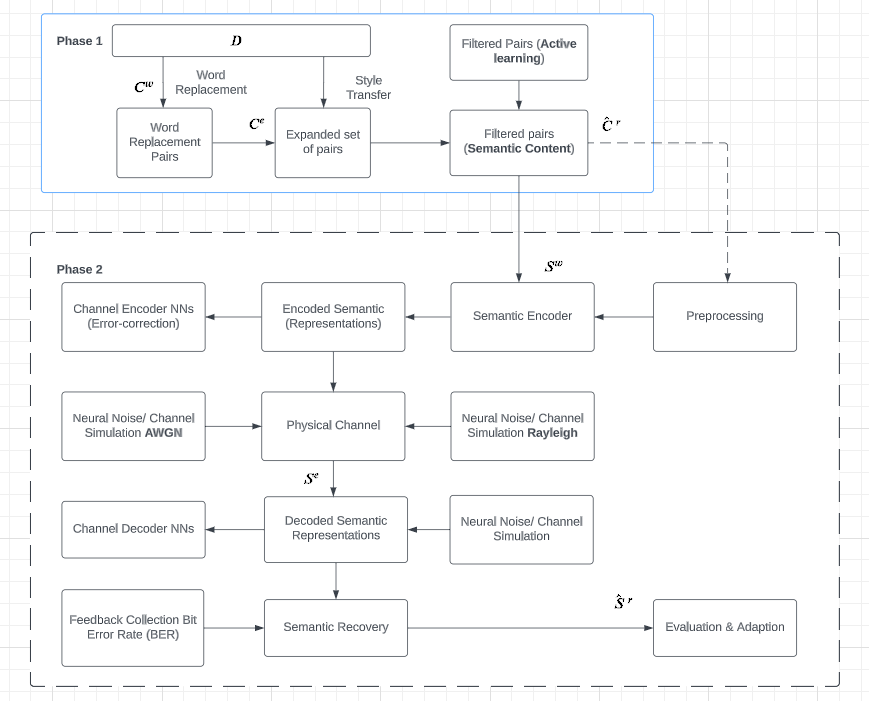

###*Phase 1,* Human-Guided Fair Classification for NLP

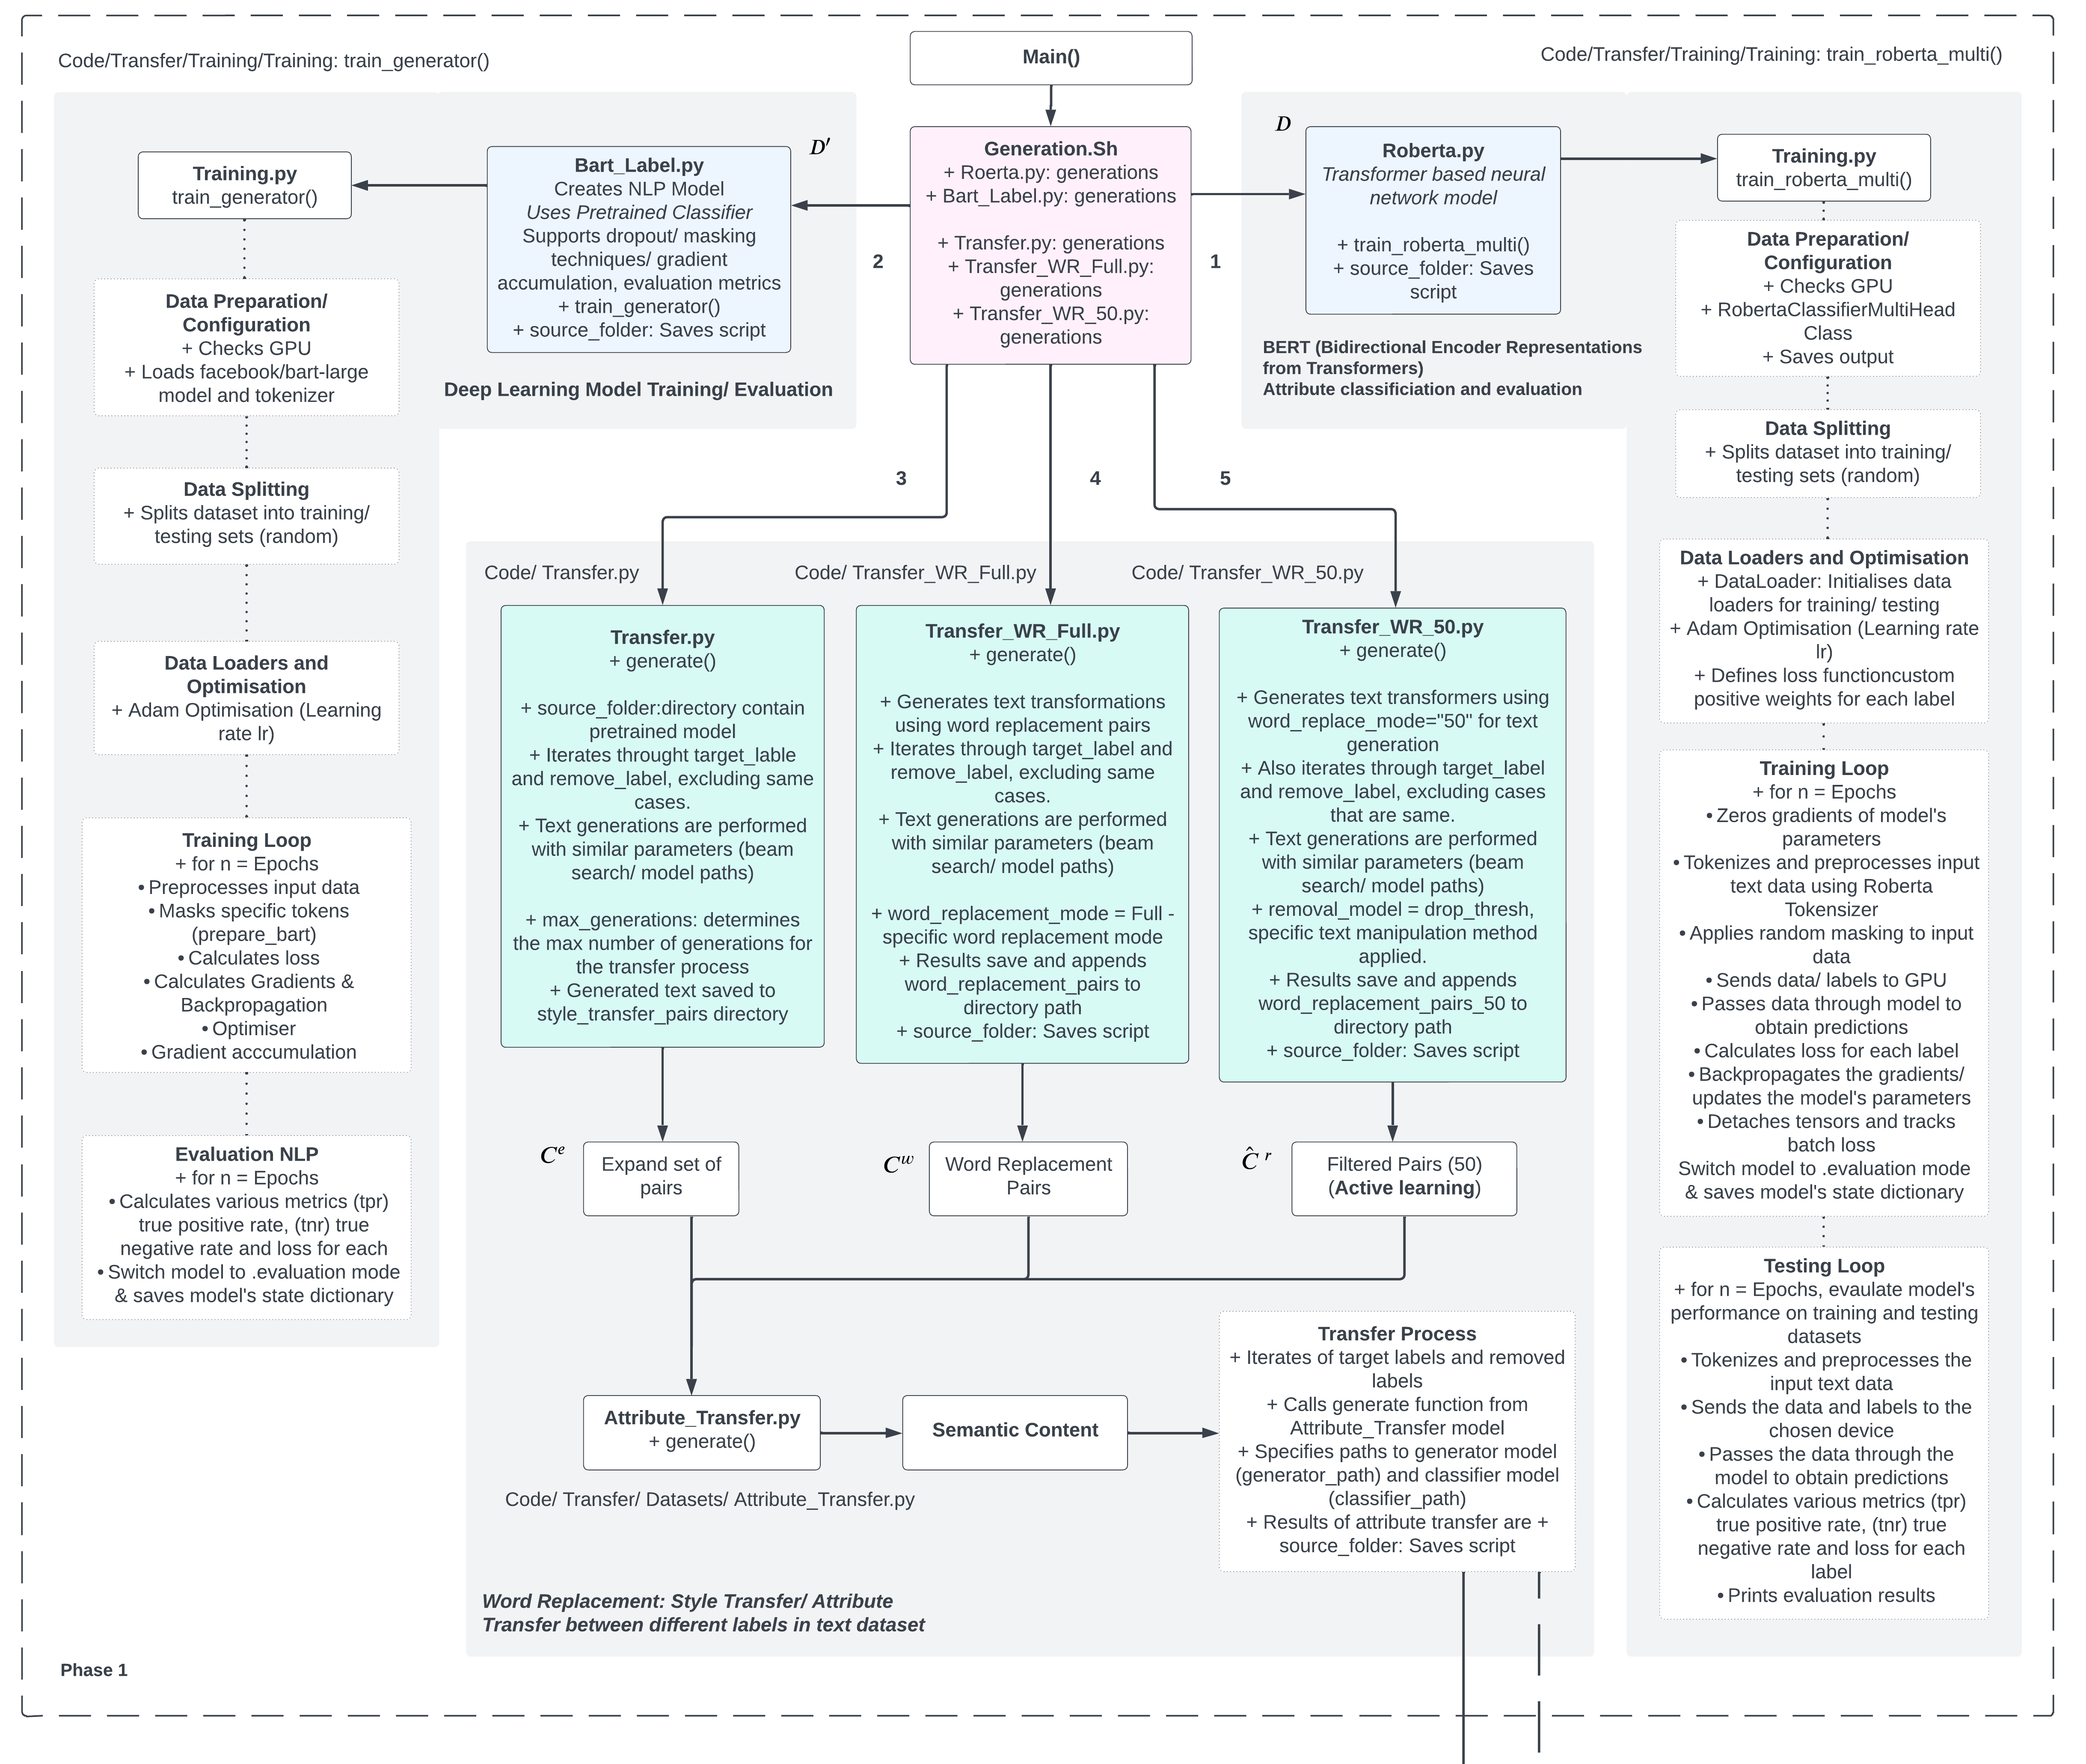

##**Step 1. Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


##**Step 2. Download train.csv file (Civil Comments dataset) and install dependencies**
####*Set up a virtual environment with the required packages*

####*Note: Google Colab already has Python pre-installed therefore you don't need to create a virtual environment, instead install dependencies.*

In [ ]:
%cd /content/drive/MyDrive/fairness-feedback-nlp/Code

/content/drive/MyDrive/fairness-feedback-nlp/Code


In [ ]:
!sudo apt-get update
!sudo apt-get install python3.8
!python3.8 -m ensurepip --upgrade

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,326 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,046 kB]
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/unive

In [ ]:
#list python versions
!ls /usr/bin/python*

/usr/bin/python3     /usr/bin/python3.10-config  /usr/bin/python3-config
/usr/bin/python3.10  /usr/bin/python3.8


In [ ]:
#update python version
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1

update-alternatives: using /usr/bin/python3.8 to provide /usr/bin/python3 (python3) in auto mode


In [ ]:
#permanently install the specific version to the google colab
!sudo apt install python3-pip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python3-pip python3-setuptools python3-wheel
0 upgraded, 3 newly installed, 0 to remove and 27 not upgraded.
Need to get 1,677 kB of archives.
After this operation, 8,967 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-setuptools all 59.6.0-1.2ubuntu0.22.04.1 [339 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-wheel all 0.37.1-2ubuntu0.22.04.1 [32.0 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pip all 22.0.2+dfsg-1ubuntu0.4 [1,305 kB]
Fetched 1,677 kB in 1s (2,005 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog

In [ ]:
#Install correct packages
!sudo apt-get install python3.8-distutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3.8-lib2to3
The following NEW packages will be installed:
  python3.8-distutils python3.8-lib2to3
0 upgraded, 2 newly installed, 0 to remove and 27 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,237 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-lib2to3 all 3.8.18-1+jammy1 [126 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-distutils all 3.8.18-1+jammy1 [193 kB]
Fetched 319 kB in 0s (2,044 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize fron

##**Step 3. Run requirements**

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 98.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 KB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.0/777.0 KB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 117.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 736.6/736.6 KB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

Check file path and script is granted permission to be executed as a program

In [ ]:
%cd /content/drive/MyDrive/fairness-feedback-nlp/Code

/content/drive/MyDrive/fairness-feedback-nlp/Code


In [ ]:
!chmod +x Generation_Quick.sh

##**Step 4. Install Transformers**

In [ ]:
!pip install transformers

In [ ]:
!source Fairness-Feedback-NLP/bin/activate

##**Step 5. Run Code (Generation_Quick)**
#####*Note: See GitHub for output, due to timelimits set by Google Collaboratory this project was generated in three parts.*

In [ ]:
#!./Generation_Quick.sh

##**Step 6. Train**
####Train the transfer pipeline and generate pairs using style transfer and word replacement.
######*Results are found in folders Code/generations.*
######*Note: Generating modified comments for all original comments in the dataset can take a long time.*


In [ ]:
!chmod +x Tables.sh

In [ ]:
!./Tables.sh #0.0 pool_nogpt generations 5 3

Source folder: generations
Source folder: /content/drive/MyDrive/fairness-feedback-nlp/Code/generations/
Source pool: pool_nogpt
Creates Data Pools for training data
Downloading: 100% 570/570 [00:00<00:00, 2.69MB/s]
Downloading: 100% 420M/420M [00:05<00:00, 82.0MB/s]
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be ex

##**Step 7. Install pytorch lightning**

##**Step 7. Visualise data (Evaluation of robustness of text classification model) Phase 1**
####Find lower bound, mean, upper bound
####Code loads the data from the JSON file into a dictionary (x-axis labels and tick marks), plot displays mean values as bars with error bars corresponding to the lower and upper bounds.
<br>

###Extracts the lower bounds, means, and upper bounds from the dictionary and creates a bar graph using matplotlib.

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
import ast
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

wrtpr_classifier: Test Accuracy = 0.906, 95% CI = (0.838, 0.974)
wrtnr_classifier: Test Accuracy = 0.858, 95% CI = (0.777, 0.940)
wrba_classifier: Test Accuracy = 0.882, 95% CI = (0.807, 0.958)
wracc_classifier: Test Accuracy = 0.864, 95% CI = (0.784, 0.944)
wrrobust_single: Test Accuracy = 0.745, 95% CI = (0.643, 0.847)
wrrobust_all: Test Accuracy = 0.739, 95% CI = (0.636, 0.843)
wr50tpr_classifier: Test Accuracy = 0.906, 95% CI = (0.838, 0.975)
wr50tnr_classifier: Test Accuracy = 0.858, 95% CI = (0.776, 0.940)
wr50ba_classifier: Test Accuracy = 0.882, 95% CI = (0.805, 0.959)
wr50acc_classifier: Test Accuracy = 0.864, 95% CI = (0.784, 0.944)
wr50robust_single: Test Accuracy = 0.777, 95% CI = (0.680, 0.875)
wr50robust_all: Test Accuracy = 0.671, 95% CI = (0.560, 0.782)
pooltpr_classifier: Test Accuracy = 0.906, 95% CI = (0.838, 0.974)
pooltnr_classifier: Test Accuracy = 0.858, 95% CI = (0.777, 0.940)
poolba_classifier: Test Accuracy = 0.882, 95% CI = (0.807, 0.958)
poolacc_classifier: 

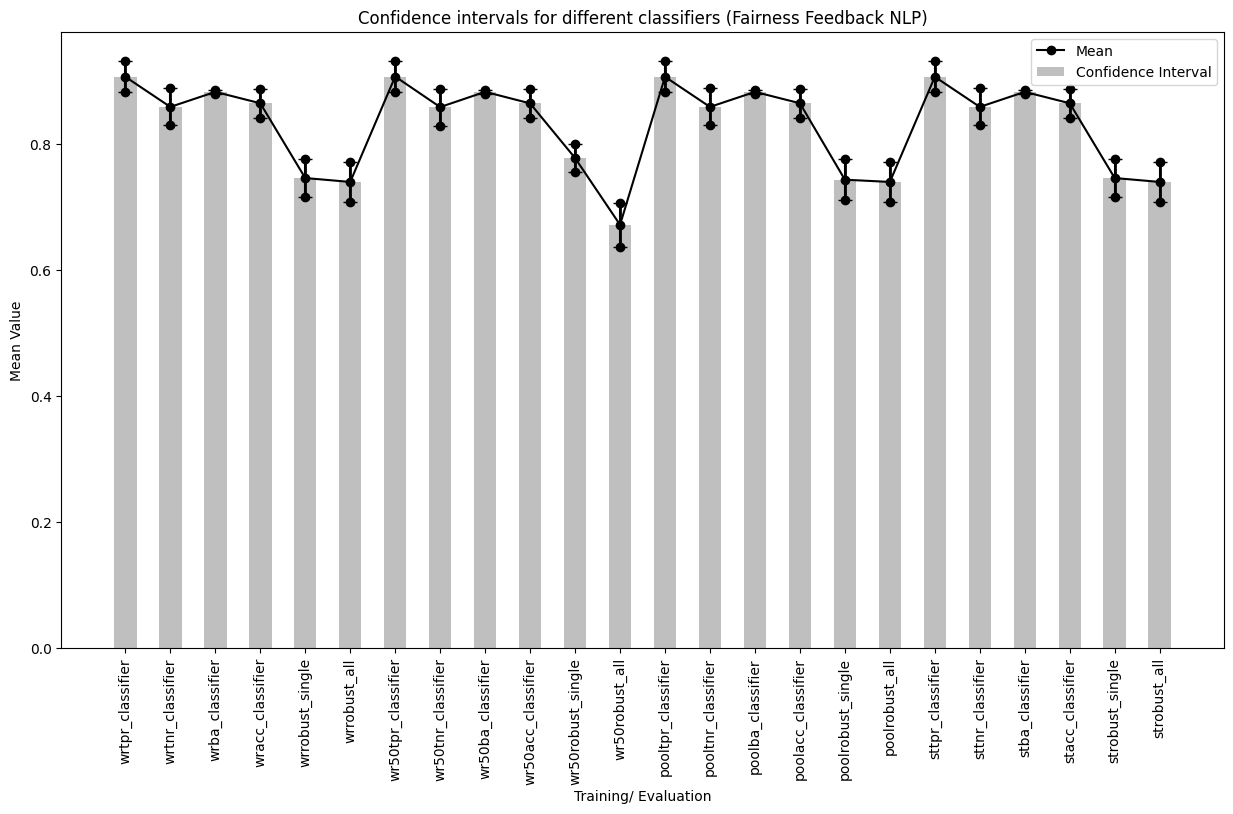

In [ ]:
# JSON Load data
source_folder = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Results/AL/"
with open(source_folder + "table1pool_nogpt0.0.json", "r") as f:
    data = json.load(f)

# Find lower bound, mean, upper bound
lower_bounds = np.array([float(val.split('LB: ')[1].split()[0]) for val in data.values()])
means = np.array([float(val.split('Mean: ')[1].split()[0]) for val in data.values()])
upper_bounds = np.array([float(val.split('UB: ')[1]) for val in data.values()])

# Calculate Mean (error bars)
lower_errs = means - lower_bounds
upper_errs = upper_bounds - means

labels = list(data.keys())  # x-axis
fig, ax = plt.subplots(figsize=(15, 8))  # Fig

# Line
ax.plot(labels, means, marker='o', label='Mean', color='k')

# Bar Confidence Interval
ax.bar(labels, means, yerr=[lower_errs, upper_errs], capsize=5, width=0.5, color='grey', alpha=0.5, label='Confidence Interval')

# Marks
ax.set_xticks(labels)
ax.tick_params(axis='x', labelrotation=90)

# Set labels
ax.set_xlabel('Training/ Evaluation')
ax.set_ylabel('Mean Value')

ax.set_title('Confidence intervals for different classifiers (Fairness Feedback NLP)')
ax.legend()

# Confidence intervals
confidence = 0.95  # Level
z_value = scipy.stats.norm.ppf((1 + confidence) / 2.0)

results = {}

for label, mean, lower, upper in zip(labels, means, means - lower_errs, means + upper_errs):
    acc_test = mean
    ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / len(data[label]))

    ci_lower = max(0, acc_test - ci_length)
    ci_upper = min(1, acc_test + ci_length)

    results[label] = {
        "Test accuracy": acc_test,
        "Lower 95% CI": ci_lower,
        "Upper 95% CI": ci_upper,
    }

    print(f"{label}: Test Accuracy = {acc_test:.3f}, 95% CI = ({ci_lower:.3f}, {ci_upper:.3f})")

for label, mean, lower, upper in zip(labels, means, means - lower_errs, means + upper_errs):
    ax.plot([label, label], [lower, upper], marker='o', color='k', linestyle='-', linewidth=2)

plt.show()


###Violin plot (seaborn)

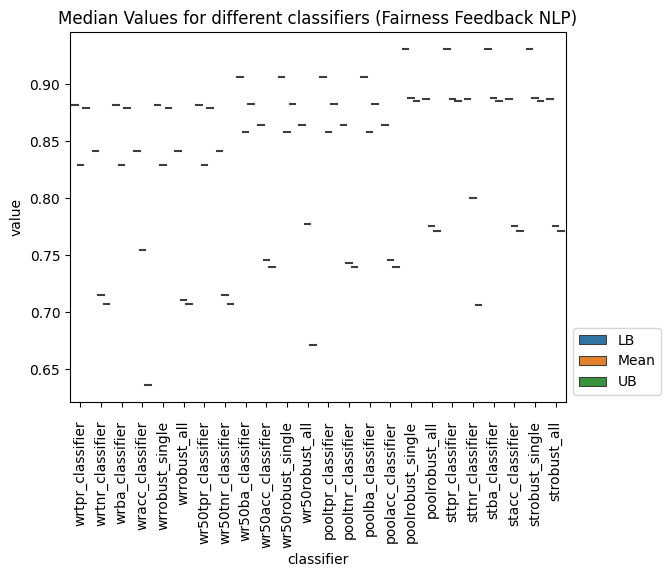

In [ ]:
# DataFrame
df = pd.DataFrame({
    'Classifier': np.repeat(list(data.keys()), 3),
    'Metric': ['LB', 'Mean', 'UB'] * len(data),
    'Value': np.hstack([lower_bounds, means, upper_bounds])
})

# Violin plot (seaborn)
fig, ax = plt.subplots()
sns.violinplot(data=df, x='classifier', y='value', hue='metric')
ax.set_xticklabels(labels=data.keys(), rotation=90)
ax.tick_params(axis='x', which='major', pad=10)
ax.set_title('Median Values for different classifiers (Fairness Feedback NLP)')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0), borderaxespad=0.5)
plt.show()

### Check Classifier Performance Metrics

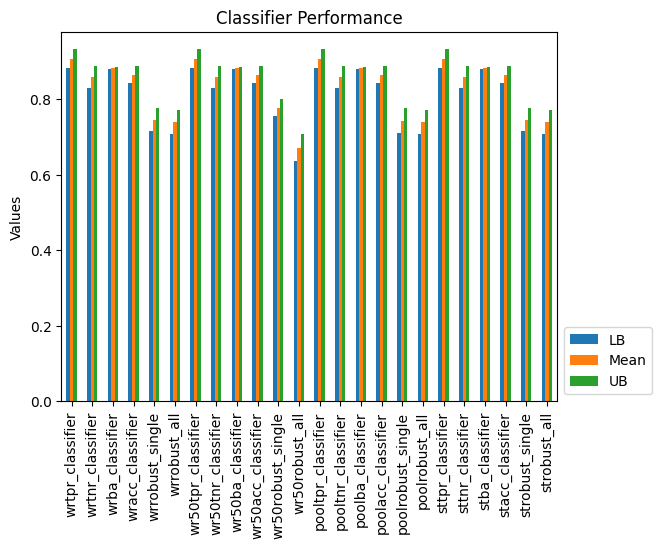

In [ ]:
# JSON (DataFrame)
df = pd.DataFrame.from_dict(data, orient='index', columns=['Values'])

# Find LB, Mean, and UB values from Values
df[['LB', 'Mean', 'UB']] = df['Values'].str.extract(r'LB: ([\d.]+) Mean: ([\d.]+) UB: ([\d.]+)')

# Convert values to float data type (for display)
df = df.astype({'LB': 'float', 'Mean': 'float', 'UB': 'float'})

# Plot each classifier
fig, ax = plt.subplots()
df.plot.bar(ax=ax)
ax.set_ylabel('Values')
ax.set_title('Classifier Performance')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0), borderaxespad=0.5)
plt.show()

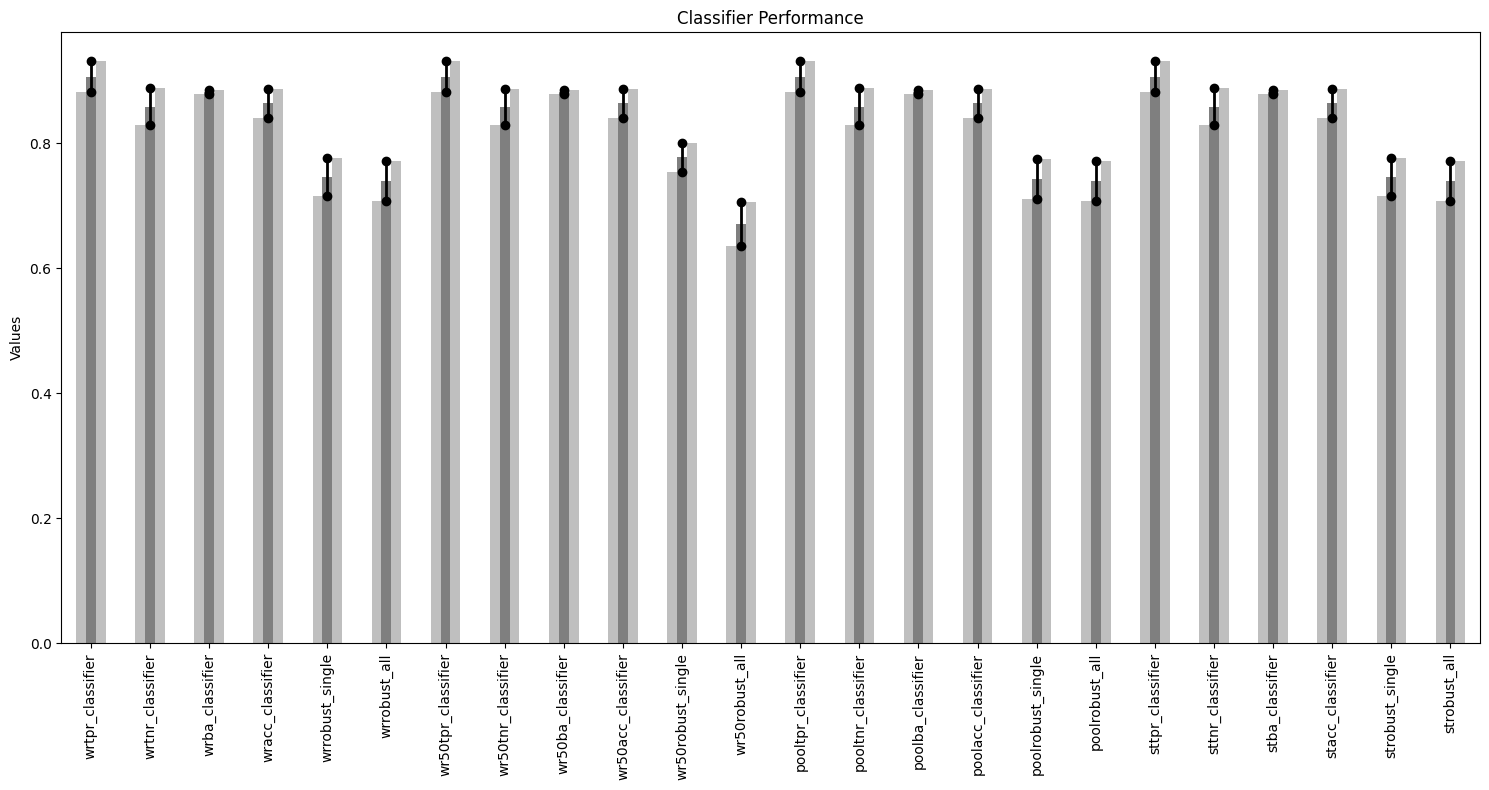

In [ ]:
# Plot
df = pd.DataFrame.from_dict(data, orient='index', columns=['Mean Values'])

# Find LB, Mean, and UB values
df[['LB', 'Mean', 'UB']] = df['Values'].str.extract(r'LB: ([\d.]+) Mean: ([\d.]+) UB: ([\d.]+)')

# Calues to float
df = df.astype({'LB': 'float', 'Mean': 'float', 'UB': 'float'})

# Plot classifier/s
fig, ax2 = plt.subplots(figsize=(15, 8))
df.plot.bar(ax=ax2, color=['grey', 'k', 'grey'], alpha=0.5, width=0.5, capsize=5, legend=False)
ax2.set_ylabel('Values')
ax2.set_title('Classifier Performance')

# Display the confidence interval bars
for i, (label, row) in enumerate(df.iterrows()):
    ax2.plot([i, i], [row['LB'], row['UB']], marker='o', color='k', linestyle='-', linewidth=2)

plt.tight_layout()  # Adjust
plt.show()


##*Evaluate Performance using accuracy, precision, recall and f1 score*
#### Using data exported from classifier testing

In [ ]:
output_folder = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Scores"
file_path = f"{output_folder}/scores_output_3.csv"
df = pd.read_csv(file_path)

# String to dictionary
df['predicted_scores'] = df['predicted_scores'].apply(ast.literal_eval)

# Extract true labels/ ground truth
true_labels = df['target'].apply(lambda x: 1 if x > 0.5 else 0)

# Predicted classifiers score
predicted_labels = {
    "roberta_neg": df['predicted_scores'].apply(lambda x: 1 if x['roberta_neg'] > 0.5 else 0),
    "roberta_neu": df['predicted_scores'].apply(lambda x: 1 if x['roberta_neu'] > 0.5 else 0),
    "roberta_pos": df['predicted_scores'].apply(lambda x: 1 if x['roberta_pos'] > 0.5 else 0),
}

# Evaluate performance (each classifier)
for classifier, predictions in predicted_labels.items():
    # Metrics
    acc = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)

    # Results
    print(f"\nMetrics for {classifier}:")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")



Metrics for roberta_neg:
Accuracy: 0.526
Precision: 0.124
Recall: 0.960
F1 Score: 0.219

Metrics for roberta_neu:
Accuracy: 0.626
Precision: 0.000
Recall: 0.000
F1 Score: 0.000

Metrics for roberta_pos:
Accuracy: 0.895
Precision: 0.067
Recall: 0.040
F1 Score: 0.050


In [ ]:
# Check data
print(df.columns)

Index(['Unnamed: 0', 'id', 'target', 'comment_text', 'severe_toxicity',
       'obscene', 'identity_attack', 'insult', 'threat', 'asian', 'atheist',
       'bisexual', 'black', 'buddhist', 'christian', 'female', 'heterosexual',
       'hindu', 'homosexual_gay_or_lesbian',
       'intellectual_or_learning_disability', 'jewish', 'latino', 'male',
       'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity',
       'other_religion', 'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count', 'label',
       'scores', '0', '0.1', '0.2', 'predicted_scores'],
      dtype='object')


In [ ]:
print(df['label'].unique())

[2 0 1 3 4]


In [ ]:
print(predicted_labels.dtype)
print(predicted_labels.unique())

object
['roberta_neu' 'roberta_neg' 'roberta_pos']


##*Find Predictated and Actual Scores for Roberta Model (DualModel Custom)*

In [ ]:
# Re run test
!./Tables.sh #pool_nogpt generations 5 3 --eval_maskedwr50 --train_maskedwr50

Source folder: generations
Source folder: /content/drive/MyDrive/fairness-feedback-nlp/Code/generations/
Source pool: pool_nogpt
Creates Data Pools for training data
Downloading: 100% 570/570 [00:00<00:00, 2.86MB/s]
Downloading: 100% 420M/420M [00:05<00:00, 78.9MB/s]
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be ex

In [ ]:
# Find Predictated Scores
true_labels = df['label']

# Predicted scores
predicted_scores = df['predicted_scores'].apply(lambda x: max(x, key=x.get))

# Map labels to values
predicted_labels_numeric = predicted_scores.map(label_mapping)

# Evaluate
acc = accuracy_score(true_labels, predicted_labels_numeric)
precision = precision_score(true_labels, predicted_labels_numeric, average='weighted', zero_division=0)
recall = recall_score(true_labels, predicted_labels_numeric, average='weighted')

print("Predictated Scores DualModel")
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)


Predictated Scores DualModel
Accuracy: 0.45706371191135736
Precision: 0.6683356544033875
Recall: 0.45706371191135736


In [ ]:
# Find Actual Scores
true_labels = df['label']

# Scores (actual)
predicted_scores = df['scores'].apply(lambda x: max(x, key=x.get))

# Map labels to values
predicted_labels_numeric = predicted_scores.map(label_mapping)

# Evaluate
acc = accuracy_score(true_labels, predicted_labels_numeric)
precision = precision_score(true_labels, predicted_labels_numeric, average='weighted', zero_division=0)
recall = recall_score(true_labels, predicted_labels_numeric, average='weighted')

print("Actual Scores DualModel")
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)


Actual Scores DualModel
Accuracy: 0.853185595567867
Precision: 0.7279256604844959
Recall: 0.853185595567867


###*Phase 2,* Semantic Communication
#####See GitHub for *Phase 2 (Part 1) and Phase 2 (Part 2)* Implementation
